In [1]:
from keras import layers
from keras import models
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 28s 30ms/step - loss: 0.1812 - accuracy: 0.9428
Epoch 2/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0478 - accuracy: 0.9852
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0328 - accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0254 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0198 - accuracy: 0.9942


In [7]:
tes_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0312 - accuracy: 0.9912


0.9911999702453613

In [8]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model_no_max_pool.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________




컨브넷 훈련하기



In [4]:
import os, shutil

In [5]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)


# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [7]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [8]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [9]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [10]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [11]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, # 타깃 디렉터리
                                                   target_size=(150, 150), # 모든 이미지를 150x150 크기로 바꿉니다.
                                                   batch_size=20, 
                                                    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [17]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator,
                             validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 73s 731ms/step - loss: 0.6908 - acc: 0.5255 - val_loss: 0.6707 - val_acc: 0.6110
Epoch 2/30
100/100 [==============================] - 62s 624ms/step - loss: 0.6623 - acc: 0.6130 - val_loss: 0.6872 - val_acc: 0.5630
Epoch 3/30
100/100 [==============================] - 63s 626ms/step - loss: 0.6156 - acc: 0.6610 - val_loss: 0.6383 - val_acc: 0.6240
Epoch 4/30
100/100 [==============================] - 62s 619ms/step - loss: 0.5667 - acc: 0.7035 - val_loss: 0.5961 - val_acc: 0.6660
Epoch 5/30
100/100 [==============================] - 62s 620ms/step - loss: 0.5379 - acc: 0.7340 - val_loss: 0.5842 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 64s 637ms/step - loss: 0.5095 - acc: 0.7455 - val_loss: 0.6392 - val_acc: 0.6440
Epoch 7/30
100/100 [==============================] - 62s 622ms/step - loss: 0.4742 - acc: 0.7775 - val_loss: 0.57

In [18]:
model.save('cats_and_dogs_small_1.h5')

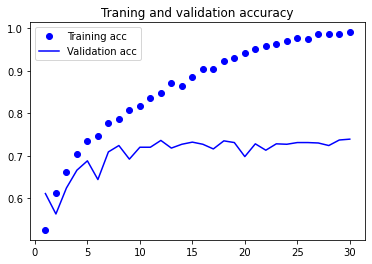

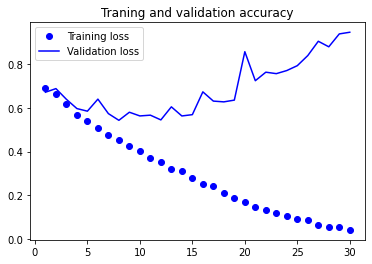

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [20]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
                            shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

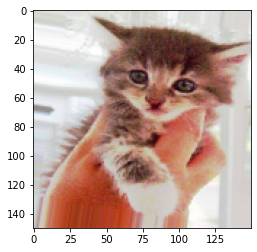

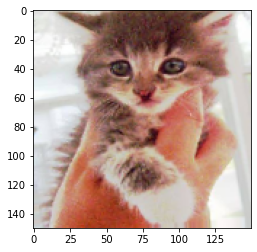

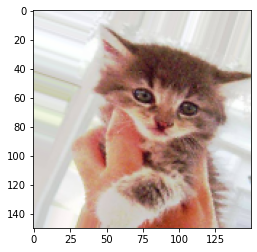

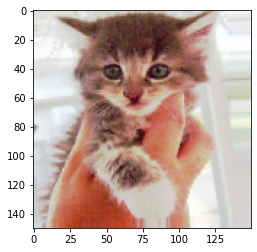

In [24]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지를 선택합니다.
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다.
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다.
x = image.img_to_array(img)
# (1, 150, 150, 3) 크기로 변환합니다.
x = x.reshape((1, ) + x.shape)

# 랜덤하게 변환된 이미지 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다.
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [25]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                            shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# 검증 데이터는 증식되어서는 안됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   # 모든 이미지를 150x150 크기로 바꿉니다.
                                                   target_size=(150, 150), batch_size=32,
                                                    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다.
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                       batch_size=32, class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=50, epochs=100, validation_data=validation_generator,
                             validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
50/50 [==============================] - 44s 885ms/step - loss: 0.6785 - accuracy: 0.5694 - val_loss: 0.6651 - val_accuracy: 0.6020
Epoch 2/100
50/50 [==============================] - 45s 907ms/step - loss: 0.6803 - accuracy: 0.5625
Epoch 3/100
50/50 [==============================] - 44s 874ms/step - loss: 0.6769 - accuracy: 0.5833
Epoch 4/100
50/50 [==============================] - 40s 790ms/step - loss: 0.6659 - accuracy: 0.5975
Epoch 5/100
50/50 [==============================] - 45s 896ms/step - loss: 0.6570 - accuracy: 0.5922
Epoch 6/100
50/50 [==============================] - 42s 846ms/step - loss: 0.6539 - accuracy: 0.6250
Epoch 7/100
50/50 [==============================] - 46s 916ms/step - loss: 0.6493 - accuracy: 0.6048
Epoch 8/100
50/50 [==============================] - 46s 922ms/step - loss: 0.6372 - accuracy: 0.6414
Epoch 9/100
50/50 [==============================] - 48s 9

50/50 [==============================] - 39s 779ms/step - loss: 0.4713 - accuracy: 0.7797
Epoch 77/100
50/50 [==============================] - 46s 913ms/step - loss: 0.4663 - accuracy: 0.7759
Epoch 78/100
50/50 [==============================] - 43s 866ms/step - loss: 0.4506 - accuracy: 0.7869
Epoch 79/100
50/50 [==============================] - 47s 940ms/step - loss: 0.4596 - accuracy: 0.7727
Epoch 80/100
50/50 [==============================] - 47s 939ms/step - loss: 0.4433 - accuracy: 0.7844
Epoch 81/100
50/50 [==============================] - 46s 922ms/step - loss: 0.4507 - accuracy: 0.7841
Epoch 82/100
50/50 [==============================] - 43s 861ms/step - loss: 0.4645 - accuracy: 0.7790
Epoch 83/100
50/50 [==============================] - 41s 814ms/step - loss: 0.4488 - accuracy: 0.7822
Epoch 84/100
50/50 [==============================] - 40s 808ms/step - loss: 0.4636 - accuracy: 0.7708
Epoch 85/100
50/50 [==============================] - 41s 817ms/step - loss: 0.4265 - 

In [33]:
model.save('cats_and_dogd_small_2.h5')

In [31]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 6s 0us/step


In [32]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     



데이터 증식을 사용하지 않는 빠른 특성 추출



In [34]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어 내므로 모든 이미지를 한 번씩 처리하고 나면 중지됩니다.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [36]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20,
                   validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 33ms/step - loss: 0.5969 - accuracy: 0.6805 - val_loss: 0.4560 - val_accuracy: 0.8260
Epoch 2/30
100/100 [==============================] - 3s 33ms/step - loss: 0.4382 - accuracy: 0.7945 - val_loss: 0.3670 - val_accuracy: 0.8700
Epoch 3/30
100/100 [==============================] - 3s 32ms/step - loss: 0.3596 - accuracy: 0.8490 - val_loss: 0.3230 - val_accuracy: 0.8860
Epoch 4/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3191 - accuracy: 0.8635 - val_loss: 0.3012 - val_accuracy: 0.8940
Epoch 5/30
100/100 [==============================] - 3s 32ms/step - loss: 0.2961 - accuracy: 0.8725 - val_loss: 0.2880 - val_accuracy: 0.8950
Epoch 6/30
100/100 [==============================] - 3s 33ms/step - loss: 0.2643 - accuracy: 0.8915 - val_loss: 0.2743 - val_accuracy: 0.9010
Epoch 7/30
100/100 [==============================] - 4s 35ms/step - loss: 0.2473 - accuracy: 0.9065 - val_loss: 0.2662 - val_accuracy: 0.9010

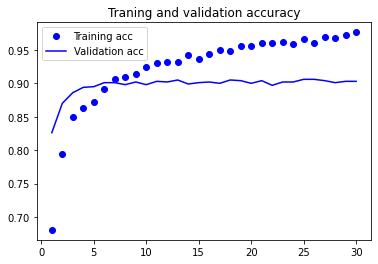

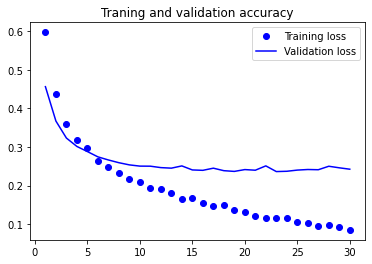

In [38]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [39]:
from keras import models
from keras import layers
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [41]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


In [43]:
conv_base.trainable = False

In [44]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [47]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.1,
                                   height_shift_range=0.1, shear_range=0.1,
                                   zoom_range=0.1, horizontal_flip=True,
                                   fill_mode='nearest')

# 검증 데이터는 증식되어서는 안됩니다.
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(train_dir, #  타깃 디렉터리
                                                    #모든 이미지의 크기를 150x150으로 변경합니다.
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다.
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                                target_size=(150, 150),
                                                                batch_size=20,
                                                                class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50, verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 - 267s - loss: 0.4048 - accuracy: 0.8255 - val_loss: 0.3360 - val_accuracy: 0.8780
Epoch 2/30
100/100 - 270s - loss: 0.3567 - accuracy: 0.8505 - val_loss: 0.3094 - val_accuracy: 0.8810
Epoch 3/30
100/100 - 281s - loss: 0.3270 - accuracy: 0.8680 - val_loss: 0.2883 - val_accuracy: 0.8870
Epoch 4/30
100/100 - 279s - loss: 0.3058 - accuracy: 0.8750 - val_loss: 0.2801 - val_accuracy: 0.8880
Epoch 5/30
100/100 - 285s - loss: 0.2995 - accuracy: 0.8710 - val_loss: 0.2664 - val_accuracy: 0.8980
Epoch 6/30


KeyboardInterrupt: 